## STMO Project

In [8]:
!pip install osmnx networkx

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

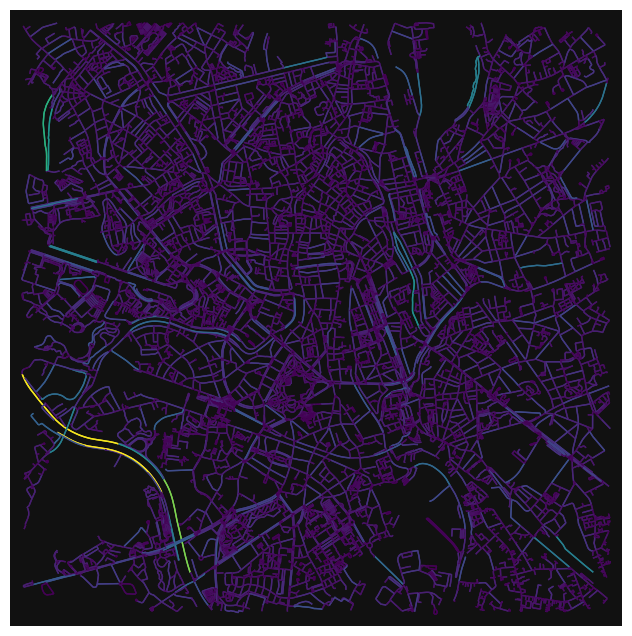

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
# Define the address as a starting point
address = "Sint-kwintensberg 74, Ghent, Belgium"

# Geocode the address to get its latitude and longitude
center_point = ox.geocode(address)

# Define the buffer distance (in meters) for the map area
buffer_distance = 3000  # 2 km radius

# Download the street network data within the buffer distance around the center point
graph = ox.graph_from_point(center_point, dist=buffer_distance, network_type='walk')
graph = ox.distance.add_edge_lengths(graph)

# Plot the graph to verify
ec = ox.plot.get_edge_colors_by_attr(graph, attr='length')
ox.plot_graph(graph, edge_color=ec, node_alpha=0)

In [3]:
edge_lengths = {}
for u, v, data in graph.edges(data=True):
    # Get the length of each edge in meters
    edge_lengths[(u, v)] = data.get('length', None)

# Print the edge lengths
for edge, length in edge_lengths.items():
    if length:
        print(f"Edge {edge} has length {length:.2f} meters.")

Edge (145763, 10608884795) has length 305.04 meters.
Edge (145763, 1679740532) has length 143.05 meters.
Edge (145763, 11958115602) has length 133.67 meters.
Edge (145785, 31366176) has length 34.55 meters.
Edge (145785, 1788439106) has length 22.52 meters.
Edge (145785, 11252918828) has length 54.91 meters.
Edge (145786, 36892129) has length 15.93 meters.
Edge (145786, 1787465284) has length 7.97 meters.
Edge (145786, 1787461015) has length 12.12 meters.
Edge (145786, 26268454) has length 14.93 meters.
Edge (145787, 1787465264) has length 7.83 meters.
Edge (145787, 204735153) has length 67.45 meters.
Edge (145787, 36892129) has length 15.10 meters.
Edge (145789, 461859280) has length 23.84 meters.
Edge (145789, 2371636971) has length 27.30 meters.
Edge (145789, 248070737) has length 29.37 meters.
Edge (145789, 7656144147) has length 52.86 meters.
Edge (145790, 248070737) has length 40.99 meters.
Edge (145790, 248070739) has length 64.80 meters.
Edge (145790, 248070701) has length 76.1

In [4]:
import random
import numpy as np
import networkx as nx
import osmnx as ox

def calculate_route_length(graph, route):
    """Calculate the total length of a route."""
    
    return length


def simulated_annealing_for_running(graph, start_address, distance, max_iterations=1000, initial_temp=1000, cooling_rate=0.003):
    """
    Perform simulated annealing to find an approximate running route starting from a given address
    and covering a specified distance.

    Parameters:
    - graph: A network graph object (from OSMnx).
    - start_address: Starting address as a string.
    - distance: Desired approximate distance for the route (in meters).
    - max_iterations: Maximum number of iterations (default=1000).
    - initial_temp: Starting temperature for the annealing process (default=1000).
    - cooling_rate: Cooling rate for the temperature (default=0.003).

    Returns:
    - best_route: The best route found.
    - best_length: The length of the best route.
    """
    def get_random_neighbor(route):
        """Generate a random neighbor by modifying the route."""
        new_route = route[:]
        if len(route) > 3:  # Ensure at least 3 nodes to swap two inner nodes
            idx1, idx2 = random.sample(range(1, len(route) - 1), 2)
            new_route[idx1], new_route[idx2] = new_route[idx2], new_route[idx1]
        return new_route

    # Geocode the starting address to get the corresponding node
    start_point = ox.geocode(start_address)
    start_node = ox.nearest_nodes(graph, start_point[1], start_point[0])

    # Initialize the route as a loop around the start node
    neighbors = list(graph.neighbors(start_node))
    if not neighbors:
        raise ValueError("No neighbors found for the starting point. Check the graph.")

    current_route = [start_node, random.choice(neighbors), start_node]
    current_length = calculate_route_length(graph, current_route)

    best_route = current_route
    best_length = current_length
    temperature = initial_temp

    print("Starting simulated annealing...")
    print(f"Target distance: {distance} meters")

    for i in range(max_iterations):
        new_route = get_random_neighbor(current_route)

        try:
            new_length = calculate_route_length(graph, new_route)
        except Exception:
            continue

        current_penalty = abs(current_length - distance)
        new_penalty = abs(new_length - distance)

        delta_penalty = new_penalty - current_penalty

        if delta_penalty < 0 or np.exp(-delta_penalty / temperature) > random.random():
            current_route = new_route
            current_length = new_length

            if abs(current_length - distance) < abs(best_length - distance):
                best_route = current_route
                best_length = current_length

        temperature *= (1 - cooling_rate)

        # Log progress every 100 iterations
        if i % 100 == 0 or i == max_iterations - 1:
            print(f"Iteration {i + 1}/{max_iterations}:")
            print(f"\tCurrent route length: {current_length} meters")
            print(f"\tBest route length: {best_length} meters")

    print("Simulated annealing complete.")
    print(f"Best route found with length: {best_length} meters")
    return best_route, best_length

Starting simulated annealing...
Target distance: 2000 meters
Iteration 1/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 101/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 201/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 301/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 401/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 501/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 601/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 701/1000:
	Current route length: 97.54740987869242 meters
	Best route length: 97.54740987869242 meters
Iteration 801/1000:
	Current route le

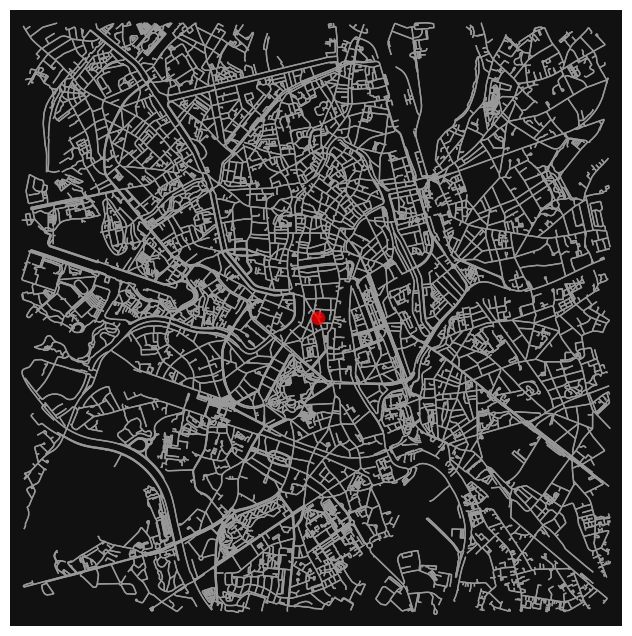

97.54740987869242


In [5]:
# Define the start point (latitude, longitude) and desired distance in meters
distance = 2000

# Run the simulated annealing algorithm
best_route, best_length = simulated_annealing_for_running(graph, 'Sint-kwintensberg 74, Ghent, Belgium', distance)

# Plot the optimized route
fig, ax = ox.plot_graph_route(graph, best_route, route_linewidth=2, node_size=0)
plt.show()
print(best_length)

In [ ]:
# HI KAAN